In [22]:
SKILLS = [
    {
      "perceptual": [
        {
          "name": "Speaker Identification",
          "description": "Recognizing, counting, or detecting speakers or speech events are present in audio.",
          "example": "How many speakers are there in the audio??"
        },
        {
          "name": "Speaker Demographics",
          "description": "Identifying characteristics of speakers like age, sex, or background.",
          "example": "How old is the second speaker?"
        },
        {
          "name": "Language Identification",
          "description": "Determining the language, dialect, or accent spoken.",
          "example": "Based how they talk, where are the interviewees from?"
        },
        {
          "name": "Lexical and Phrase-Level Recognition",
          "description": "Identifying words and short phrases accurately from speech.",
          "example": "What is the term the speaker uses to describe themselves?"
        },
        {
          "name": "Prosody Detection",
          "description": "Recognizing rhythm, stress, intonation, and emphasis in speech.",
          "example": "What word sounds important in the answer to the question?"
        },
        {
          "name": "Paralinguistic/Emotion Recognition",
          "description": "Detecting emotions or non-verbal cues from voice.",
          "example": "How confidently does the interviewee answer the question?"
        },
        {
          "name": "Speech Activity, Turn-Taking and Overlap Detection",
          "description": "Identifying who speaks when, how turns are exchanged, and detecting overlapping speech.",
          "example": "Who decides to end the conversation?"
        },
        {
          "name": "Audio Quality, Artifacts & Channel Characteristics",
          "description": "Recognizing sound quality issues, background noise, or distortions to speech.",
          "example": "Based on how they talk, what illness does the speaker have?"
        }
      ],
      "reasoning": [
        {
          "name": "Social Role and Relationship Inference",
          "description": "Inferring relationships among speakers.",
          "example": "What is the nickname given to the friend of the first speaker"
        },
        {
          "name": "Speaker Intent, Pragmatics and Causal Reasoning",
          "description": "Understanding why something was said, implied meanings, and cause-effect relationships.",
          "example": "Why does the first speaker slowly repeat everything the second speaker says"
        },
        {
          "name": "Quantitative Reasoning (Counting/Arithmetic Comparison)",
          "description": "Using numbers, counting, and basic math to understand spoken information.",
          "example": "How many times does the speaker use foul language?"
        },
        {
          "name": "Temporal and Ordering Reasoning",
          "description": "Understanding sequence, timing, and chronological order of events described.",
          "example": "Does the man speak before the woman in this clip?"
        },
        {
          "name": "Logical/Consistency Reasoning",
          "description": "Recognizing logical sequences/inconsistencies within spoken content.",
          "example": "How did the speaker misinterpret the directions given by the GPS?"
        },
        {
          "name": "Cross-frontier Entity Linking",
          "description": "Connecting spoken references to external entities or concepts beyond the immediate context.",
          "example": "What does the first speaker do that implies they are the CEO of the company?"
        },
        {
          "name": "Ground Truth and World Knowledge Integration",
          "description": "Using general knowledge to interpret and verify spoken content.",
          "example": "What is the capital of the country mentioned by the speaker?"
        },
        {
          "name": "Contextual/Causal Scenario Reasoning",
          "description": "Understanding situations or events described, including cause-and-effect relationships within a scenario.",
          "example": "What would happen to the second speaker if the things the first speaker says happen"
        },
        {
          "name": "Semantic Abstraction and Summarization",
          "description": "Identifying main ideas, themes, or concise summaries from spoken content.",
          "example": "What is the meaning of the poem read by the speaker?"
        },
        {
          "name": "Comparative and Preference-Based Judgments",
          "description": "Evaluating and comparing spoken information, identifying preferences or rankings.",
          "example": "Which of the phrases mentioned by the speaker is the shortest"
        }
      ]
    }
  ]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

""" # Use this Codeblock for 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2) Load & move model (FP16 optional)
tokenizer = AutoTokenizer.from_pretrained("typeform/distilbert-base-uncased-mnli")
model = AutoModelForSequenceClassification.from_pretrained(
    "typeform/distilbert-base-uncased-mnli",
    torch_dtype=torch.float16
).to(device)
model.eval() """

# Use this Codeblock for Apple Silicon
if hasattr(torch.backends, "mps") and torch.backends.mps.is_available() and torch.backends.mps.is_built():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")
tokenizer = AutoTokenizer.from_pretrained("typeform/distilbert-base-uncased-mnli")
model     = AutoModelForSequenceClassification.from_pretrained(
    "typeform/distilbert-base-uncased-mnli"
).to(device)
model.eval()

# 3) Your SKILLS list…


Using device: mps


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [24]:
# 4) Fixed scoring func
def score_nli(premise: str, hypothesis: str) -> float:
    inputs = tokenizer.encode_plus(
        premise,
        hypothesis,
        return_tensors="pt",
        truncation=True,
        padding="longest"
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        logits = model(**inputs).logits
    probs = torch.softmax(logits, dim=1).squeeze()
    return probs[2].item()

In [16]:
# 5) taggers as before…
def tag_category(skills: list, question: str, tau: float = 0.002) -> list:
    scored = [(s["name"], score_nli(question, s["description"])) for s in skills]
    tags   = {name: (score >= tau) for name, score in scored}
    if not any(tags.values()):
        best, _ = max(scored, key=lambda x: x[1])
        tags[best] = True
    return [{"name": name, "score": float(score), "tag": "YES" if tags[name] else "NO"}
            for name, score in scored]

def tag_yes_categories(question: str, tau: float = 0.002) -> dict:
    perceptual = SKILLS[0]["perceptual"]
    reasoning   = SKILLS[0]["reasoning"]
    perc_tags = tag_category(perceptual, question, tau)
    reas_tags = tag_category(reasoning,   question, tau)
    return {
      "perceptual": [t["name"] for t in perc_tags if t["tag"] == "YES"],
      "reasoning":   [t["name"] for t in reas_tags if t["tag"] == "YES"]
    }

# 6) Run
if __name__ == "__main__":
    q   = "How many speakers are there in the audio?"
    yes = tag_yes_categories(q)
    print("YES perceptual skills:", yes["perceptual"])
    print("YES reasoning   skills:", yes["reasoning"])

YES perceptual skills: ['Language Identification', 'Paralinguistic/Emotion Recognition']
YES reasoning   skills: ['Quantitative Reasoning (Counting/Arithmetic Comparison)', 'Temporal and Ordering Reasoning', 'Cross-frontier Entity Linking', 'Ground Truth and World Knowledge Integration']


In [25]:
# Cell Z: Tag local speech_questions_sliced.json and output JSON
import json

def tag_local_file(input_path: str, output_path: str = None) -> str:
    """
    Reads a local JSON file of questions, tags each entry with tag_yes_categories(),
    and returns (and optionally writes) a JSON string of records with id, question,
    answer, and tags.
    
    Args:
        input_path:  path to 'speech_questions_sliced.json'
        output_path: if provided, writes the result JSON to this file
        
    Returns:
        A pretty‑printed JSON string of the tagged records.
    """
    # Load the local JSON file
    with open(input_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # Build tagged records
    tagged = []
    for entry in data:
        q = entry.get('question', '')
        ans = entry.get('answer', '')
        rec = {
            "id":       entry.get('id'),
            "question": q,
            "answer":   ans,
            "tags":     tag_yes_categories(q)
        }
        tagged.append(rec)
    
    # Serialize to JSON
    out_json = json.dumps(tagged, indent=2)
    
    # Optionally write to file
    if output_path:
        with open(output_path, 'w', encoding='utf-8') as f_out:
            f_out.write(out_json)
    
    return out_json

# Example usage:
if __name__ == "__main__":
    json_str = tag_local_file("speech_questions_sliced.json", output_path="tagged_speech_questions.json")
    print(json_str)


[
  {
    "id": "4badbbce-8fc0-4cb9-bbee-9040c95391b9",
    "question": "If all the ingredients are mixed in equal quantities, what is the most likely color of the face mask?",
    "answer": "yellow",
    "tags": {
      "perceptual": [
        "Speaker Identification",
        "Language Identification",
        "Lexical and Phrase-Level Recognition",
        "Prosody Detection",
        "Speech Activity, Turn-Taking and Overlap Detection"
      ],
      "reasoning": [
        "Quantitative Reasoning (Counting/Arithmetic Comparison)",
        "Temporal and Ordering Reasoning",
        "Logical/Consistency Reasoning",
        "Cross-frontier Entity Linking",
        "Semantic Abstraction and Summarization"
      ]
    }
  },
  {
    "id": "dfe4b75c-744b-4dc0-b1e9-67ea319a2144",
    "question": "Which operating system is indicated by the music in the audio?",
    "answer": "windows",
    "tags": {
      "perceptual": [
        "Speaker Demographics",
        "Language Identification",
  

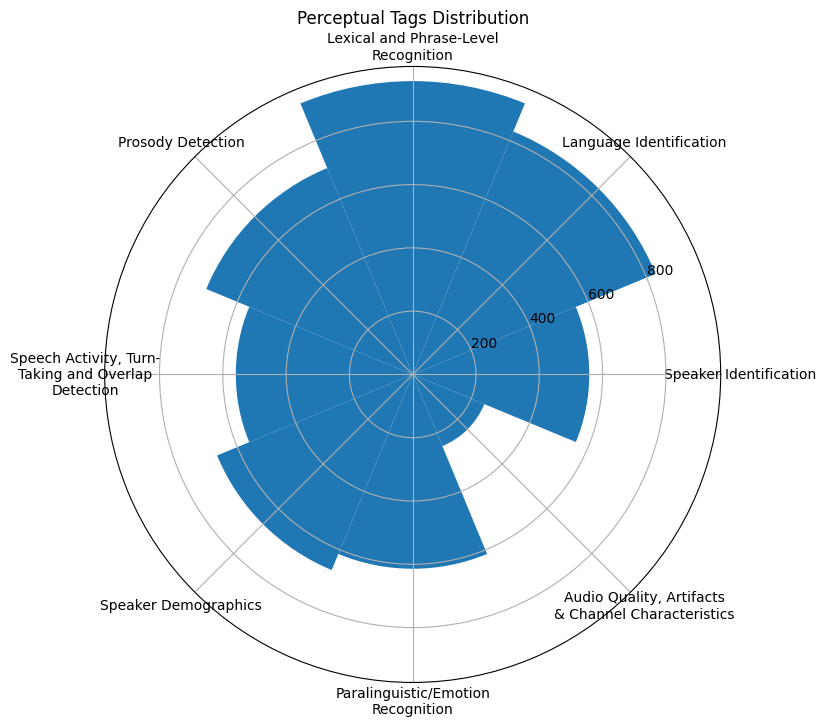

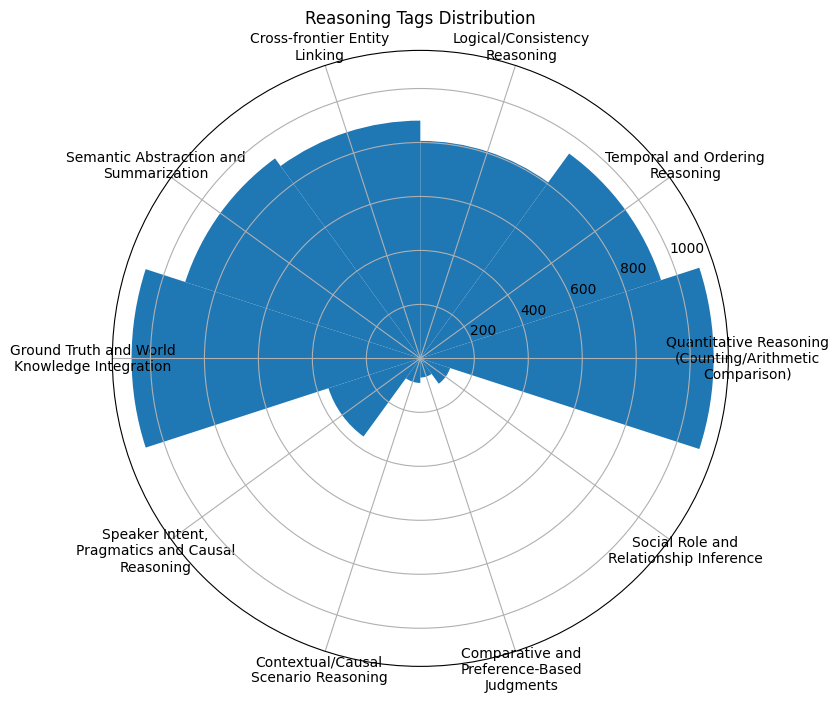

In [29]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from collections import Counter

# Path to the tagged data file
file_path = 'tagged_speech_questions.json'

if not os.path.isfile(file_path):
    print(f"Error: '{file_path}' not found. Please place it in the current directory.")
else:
    # Load tagged data
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Aggregate counts for perceptual and reasoning tags
    perc_counter = Counter()
    reas_counter = Counter()
    for entry in data:
        for tag in entry.get('tags', {}).get('perceptual', []):
            perc_counter[tag] += 1
        for tag in entry.get('tags', {}).get('reasoning', []):
            reas_counter[tag] += 1

    def plot_circular(counter, title):
        labels, counts = zip(*counter.items())
        # Wrap labels after 25 characters
        wrapped = [textwrap.fill(label, 25) for label in labels]
        N = len(labels)
        angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
        widths = 2 * np.pi / N

        fig = plt.figure(figsize=(8, 8))
        ax = plt.subplot(projection='polar')
        ax.bar(angles, counts, width=widths, bottom=0.0)
        ax.set_xticks(angles)
        ax.set_xticklabels(wrapped)
        ax.set_title(title)
        plt.savefig(title+".svg")
        return fig, ax

    # Plot and show
    plot_circular(perc_counter, 'Perceptual Tags Distribution')
    plot_circular(reas_counter, 'Reasoning Tags Distribution')
    plt.show()


In [19]:
# Cell X: Load MMSU IDs, questions & answers into a DataFrame
import pandas as pd

# raw JSON URL on GitHub
url = "https://raw.githubusercontent.com/ddlBoJack/MMAR/main/MMAR-meta.json"

# read the entire JSON file directly into pandas
df_full = pd.read_json(url)

# select only the fields we care about
df = df_full[["id", "question", "answer"]]

# show the first few rows
df.head()


,id,question,answer
0,f0VchKwpMAk_00-11-10_00-11-30,Determine what is producing the sound in the a...,Parrot
1,BV1o64y1G7p2_00-00-12_00-00-31,In what scenario does this sound occur,On a plane
2,BV1j1ABeqEyp_00-06-02_00-06-16,Why does the man in this say wait,To open the door
3,BV1Q8KHeWEDE_00-00-35_00-00-55,What did the woman do in the conversation,Scared the children away
4,BV1gt4y1e7U5_00-00-52_00-01-16,How many gunshots were heard in total,2


In [20]:
# Cell Y: Tag each question and export as JSON
import json

# Assume df (with 'id', 'question', 'answer') and tag_yes_categories() are already defined

# Build a list of records with tags
tagged_records = []
for _, row in df.iterrows():
    tags = tag_yes_categories(row['question'])
    tagged_records.append({
        "id":       row["id"],
        "question": row["question"],
        "answer":   row["answer"],
        "tags":     tags
    })

# Serialize to a pretty-printed JSON string
json_output = json.dumps(tagged_records, indent=2)

# Optionally write to file:
with open("tagged_mmsu.json", "w") as f:
    f.write(json_output)

# Print or display the JSON
print(json_output)


[
  {
    "id": "f0VchKwpMAk_00-11-10_00-11-30",
    "question": "Determine what is producing the sound in the audio",
    "answer": "Parrot",
    "tags": {
      "perceptual": [
        "Speaker Demographics",
        "Language Identification",
        "Lexical and Phrase-Level Recognition",
        "Paralinguistic/Emotion Recognition"
      ],
      "reasoning": [
        "Quantitative Reasoning (Counting/Arithmetic Comparison)",
        "Temporal and Ordering Reasoning",
        "Cross-frontier Entity Linking",
        "Ground Truth and World Knowledge Integration",
        "Semantic Abstraction and Summarization"
      ]
    }
  },
  {
    "id": "BV1o64y1G7p2_00-00-12_00-00-31",
    "question": "In what scenario does this sound occur",
    "answer": "On a plane",
    "tags": {
      "perceptual": [
        "Language Identification",
        "Lexical and Phrase-Level Recognition",
        "Prosody Detection",
        "Speech Activity, Turn-Taking and Overlap Detection",
        "Aud

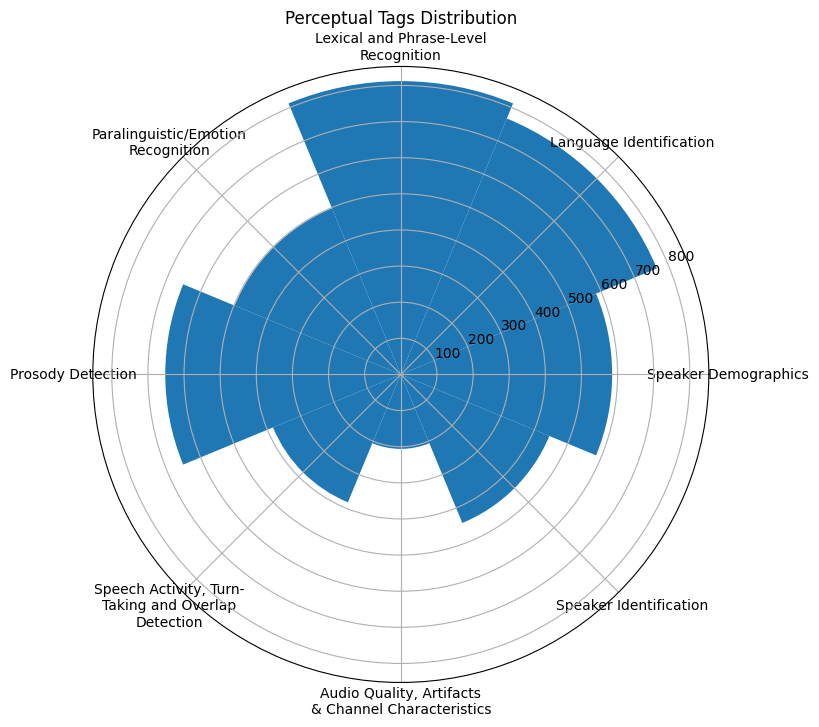

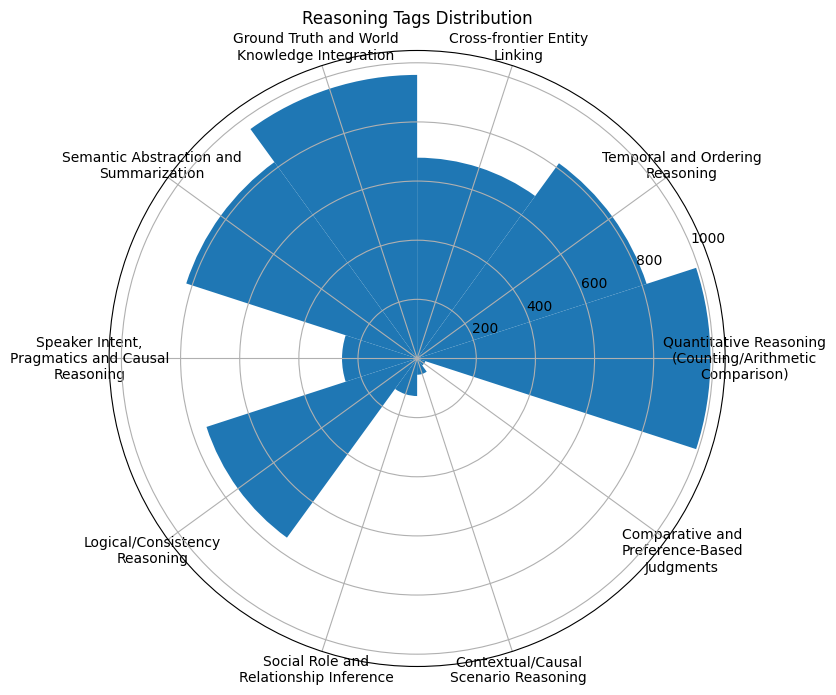

In [21]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from collections import Counter

# Path to the tagged data file
file_path = 'tagged_mmsu.json'

if not os.path.isfile(file_path):
    print(f"Error: '{file_path}' not found. Please place it in the current directory.")
else:
    # Load tagged data
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Aggregate counts for perceptual and reasoning tags
    perc_counter = Counter()
    reas_counter = Counter()
    for entry in data:
        for tag in entry.get('tags', {}).get('perceptual', []):
            perc_counter[tag] += 1
        for tag in entry.get('tags', {}).get('reasoning', []):
            reas_counter[tag] += 1

    def plot_circular(counter, title):
        labels, counts = zip(*counter.items())
        # Wrap labels after 25 characters
        wrapped = [textwrap.fill(label, 25) for label in labels]
        N = len(labels)
        angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
        widths = 2 * np.pi / N

        fig = plt.figure(figsize=(8, 8))
        ax = plt.subplot(projection='polar')
        ax.bar(angles, counts, width=widths, bottom=0.0)
        ax.set_xticks(angles)
        ax.set_xticklabels(wrapped)
        ax.set_title(title)
        return fig, ax

    # Plot and show
    plot_circular(perc_counter, 'Perceptual Tags Distribution')
    plot_circular(reas_counter, 'Reasoning Tags Distribution')
    plt.show()
